*italicized text*# Graph Data Analytics

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()

print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))

Number of nodes 34
Number of edges 78


### Calculate page rank by using simple degree centrality

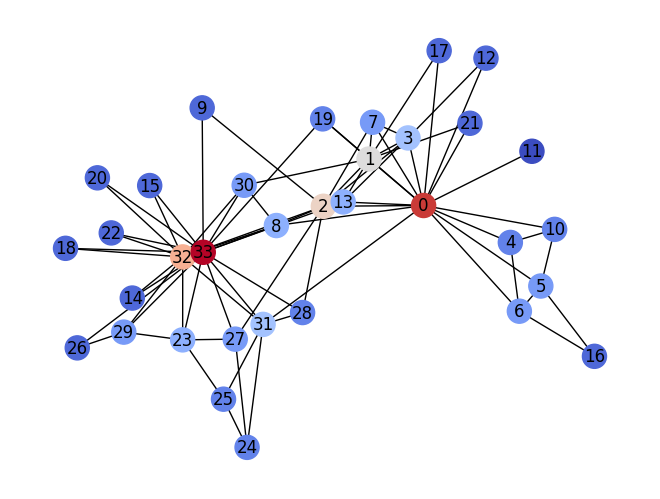

In [17]:
def simple_pagerank(G):
    pr = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return pr

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


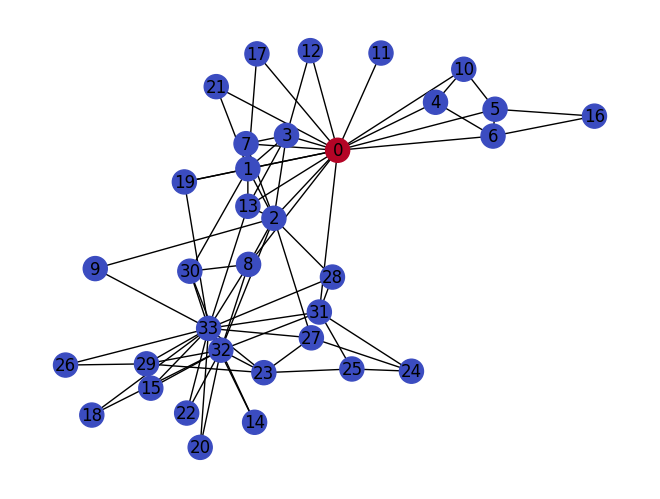

In [18]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [22]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))
G1 = G.subgraph(list(G.nodes())[100:150])
print('Number of nodes', len(G1.nodes))
print('Number of edges', len(G1.edges))
print('Average degree', sum(dict(G1.degree).values()) / len(G1.nodes))

Number of nodes 6175
Number of edges 15969
Average degree 5.172145748987854
Number of nodes 50
Number of edges 42
Average degree 1.68


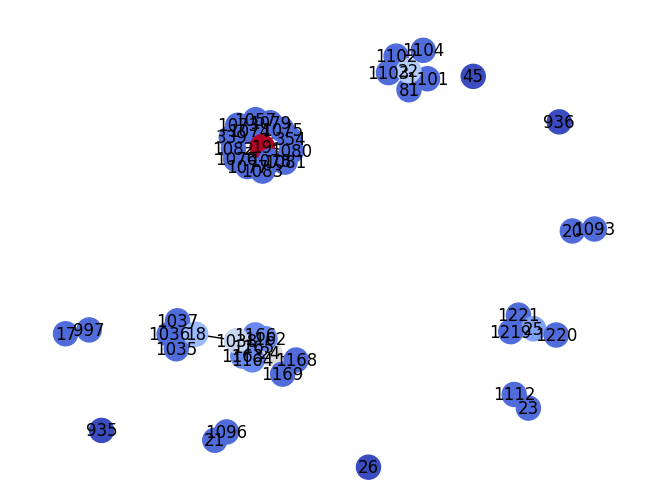

In [23]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


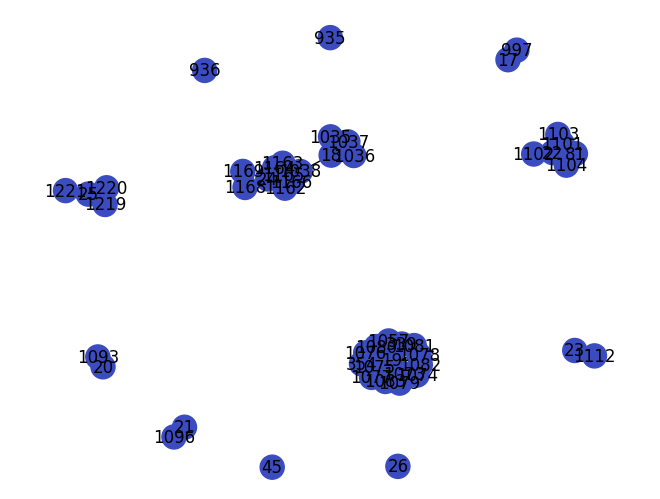

In [24]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)